In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math

from pylab import rcParams

In [0]:
%matplotlib inline
rcParams['figure.figsize']=5,4

In [0]:
dataset=pd.read_csv('Admission_Predict.csv')

In [4]:
dataset.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
y=dataset['Chance of Admit ']

In [0]:
X=dataset.drop(['Serial No.','Chance of Admit '],axis=1)

In [7]:
X.shape

(400, 7)

In [8]:
y.shape

(400,)

In [9]:
X_train=X[0:325]
y_train=y[0:325]
X_test=X[326:400]
y_test=y[326:400]

X_train["x0"]=1
X_test["x0"]=1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [0]:
def hypo(x,theta):
 return np.dot(x,theta)

In [11]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import random
theta=[]

for i in range(8):
  x=random.random()
  theta.append(x);

theta=np.array(theta)

In [13]:
h=hypo(X_train,theta.transpose())
h.shape

(325,)

In [0]:
def mse(coef, x, y): 
    h=hypo(x,coef)
    return np.mean((h - y)**2)/2

In [0]:
def gradients(coef, x, y): 
    return np.mean(x.transpose()*(np.dot(x, coef) - y), axis = 1)

In [0]:
def multilinear_regression(coef, x, y, lr, b1 = 0.9, b2 = 0.999, epsilon = 1e-8): 
    prev_error = 0
    m_coef = np.zeros(coef.shape) 
    v_coef = np.zeros(coef.shape) 
    moment_m_coef = np.zeros(coef.shape) 
    moment_v_coef = np.zeros(coef.shape) 
    t = 0
  
    while True: 
        error = mse(coef, x, y) 
        if abs(error - prev_error) <= epsilon: 
            break
        prev_error = error 
        grad = gradients(coef, x, y) 
        t += 1
        m_coef = b1 * m_coef + (1-b1)*grad 
        v_coef = b2 * v_coef + (1-b2)*grad**2
        moment_m_coef = m_coef / (1-b1**t) 
        moment_v_coef = v_coef / (1-b2**t) 
  
        delta = ((lr / moment_v_coef**0.5 + 1e-8) * 
                 (b1 * moment_m_coef + (1-b1)*grad/(1-b1**t))) 
  
        coef = np.subtract(coef, delta) 
    return coef

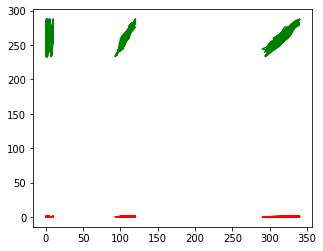

In [17]:
plt.plot(X_train,y_train,'r')
plt.plot(X_train,h,'g')

In [0]:
theta=multilinear_regression(theta, X_train, y_train, 1e-1)

In [0]:
h=hypo(X_train,theta.transpose())

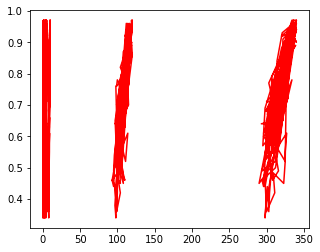

In [20]:
plt.plot(X_train,y_train,'r')



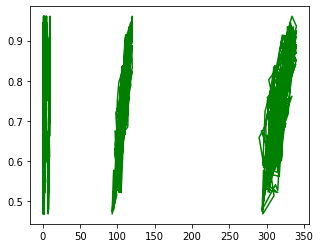

In [21]:
plt.plot(X_train,h,'g')


In [0]:
 from sklearn.metrics import r2_score

In [0]:
h2=hypo(X_test,theta)


In [24]:
r2_score(y_test,h2)

0.7433825340793356